### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



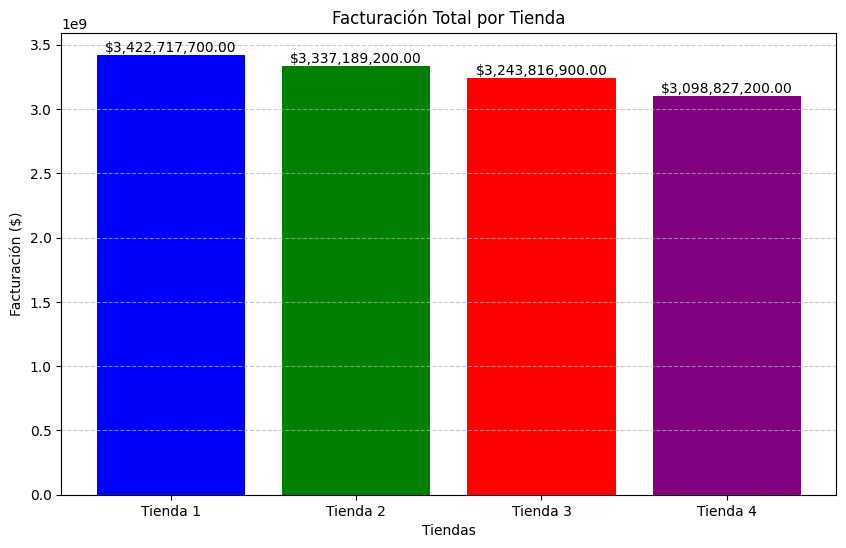

Resumen de Facturación por Tienda:
Tienda 1: $3,422,717,700.00
Tienda 2: $3,337,189,200.00
Tienda 3: $3,243,816,900.00
Tienda 4: $3,098,827,200.00


In [ ]:
# 1. Análisis de facturación
import matplotlib.pyplot as plt
import numpy as np

# Calculamos la facturación total por tienda (precio * cantidad)
tienda['facturacion'] = tienda['Precio'] * tienda['Cantidad de cuotas']
tienda2['facturacion'] = tienda2['Precio'] * tienda2['Cantidad de cuotas']
tienda3['facturacion'] = tienda3['Precio'] * tienda3['Cantidad de cuotas']
tienda4['facturacion'] = tienda4['Precio'] * tienda4['Cantidad de cuotas']

# Calculamos la facturación total por tienda
facturacion_tienda1 = tienda['facturacion'].sum()
facturacion_tienda2 = tienda2['facturacion'].sum()
facturacion_tienda3 = tienda3['facturacion'].sum()
facturacion_tienda4 = tienda4['facturacion'].sum()

# Creamos un gráfico de barras para comparar la facturación
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, facturacion, color=['blue', 'green', 'red', 'purple'])
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación ($)')

# Añadimos los valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom', rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostramos los valores en formato de tabla
print("Resumen de Facturación por Tienda:")
for i, tienda_nombre in enumerate(tiendas):
    print(f"{tienda_nombre}: ${facturacion[i]:,.2f}")

# 2. Ventas por categoría

<ipython-input-10-72300e945d07>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_categoria = todas_tiendas.groupby('Categoría del Producto').apply(


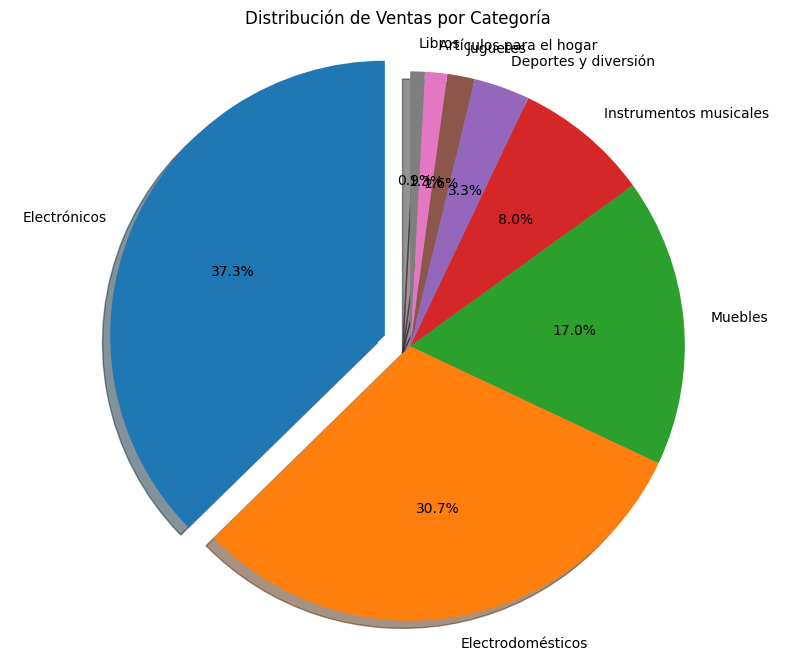

<ipython-input-10-72300e945d07>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas = df.groupby('Categoría del Producto').apply(
<ipython-input-10-72300e945d07>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas = df.groupby('Categoría del Producto').apply(
<ipython-input-10-72300e945d07>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated

Ventas por Categoría:
Electrónicos: $4,889,815,300.00
Electrodomésticos: $4,019,072,300.00
Muebles: $2,221,980,800.00
Instrumentos musicales: $1,044,612,400.00
Deportes y diversión: $432,005,500.00
Juguetes: $211,615,600.00
Artículos para el hogar: $170,360,400.00
Libros: $113,088,700.00


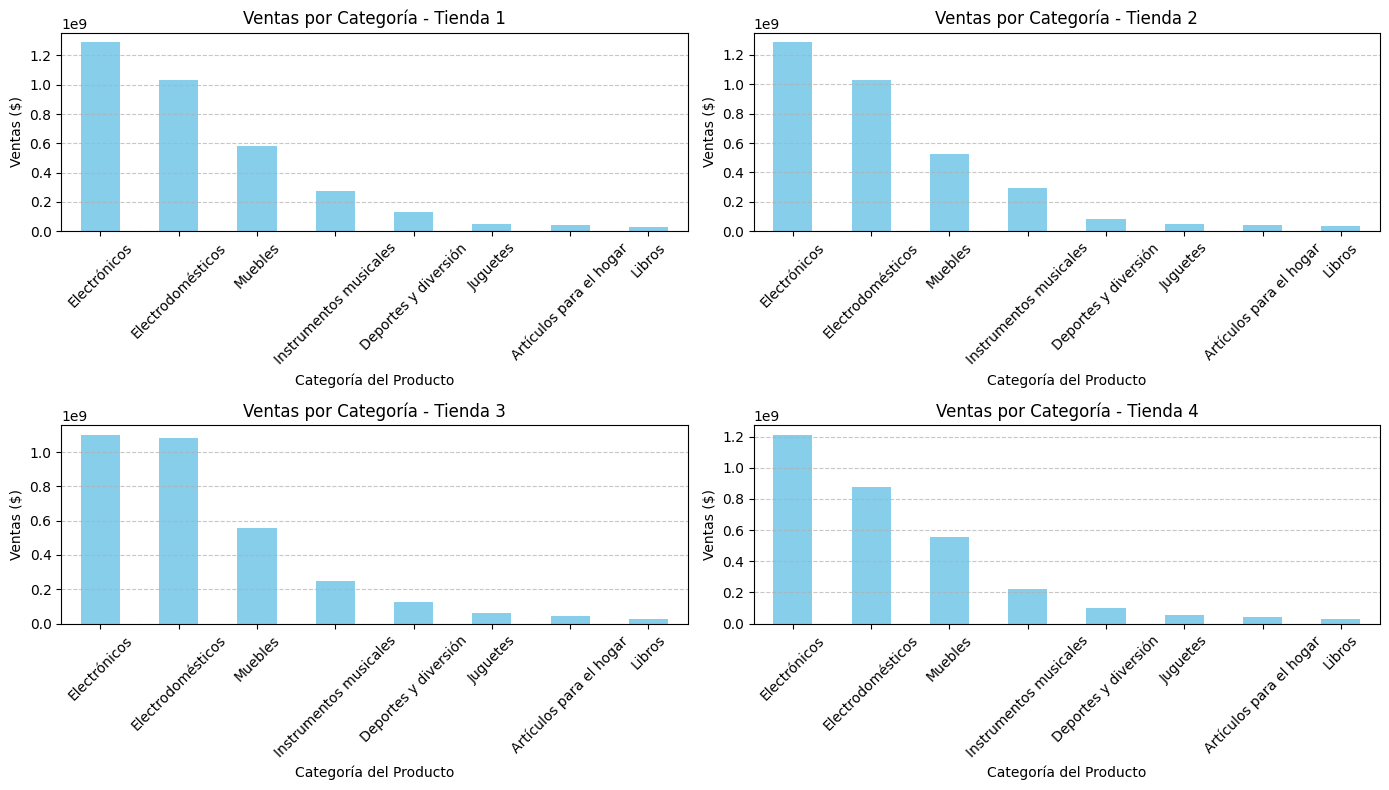

In [ ]:
# 2. Ventas por categoría
# Combinamos todos los dataframes en uno solo
todas_tiendas = pd.concat([
    tienda.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

# Agrupamos por categoría y sumamos las ventas (Precio * Cantidad)
ventas_por_categoria = todas_tiendas.groupby('Categoría del Producto').apply(
    lambda x: (x['Precio'] * x['Cantidad de cuotas']).sum()).sort_values(ascending=False)

# Creamos un gráfico de pie para mostrar la distribución de ventas por categoría
plt.figure(figsize=(10, 8))
plt.pie(ventas_por_categoria, labels=ventas_por_categoria.index, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=[0.1 if i == ventas_por_categoria.idxmax() else 0 for i in ventas_por_categoria.index])
plt.title('Distribución de Ventas por Categoría')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Mostramos los valores en formato de tabla
print("Ventas por Categoría:")
for categoria, valor in ventas_por_categoria.items():
    print(f"{categoria}: ${valor:,.2f}")

# Analizamos las categorías más vendidas por tienda
plt.figure(figsize=(14, 8))
for idx, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    plt.subplot(2, 2, idx)
    ventas = df.groupby('Categoría del Producto').apply(
        lambda x: (x['Precio'] * x['Cantidad de cuotas']).sum()).sort_values(ascending=False)
    ventas.plot(kind='bar', color='skyblue')
    plt.title(f'Ventas por Categoría - Tienda {idx}')
    plt.ylabel('Ventas ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


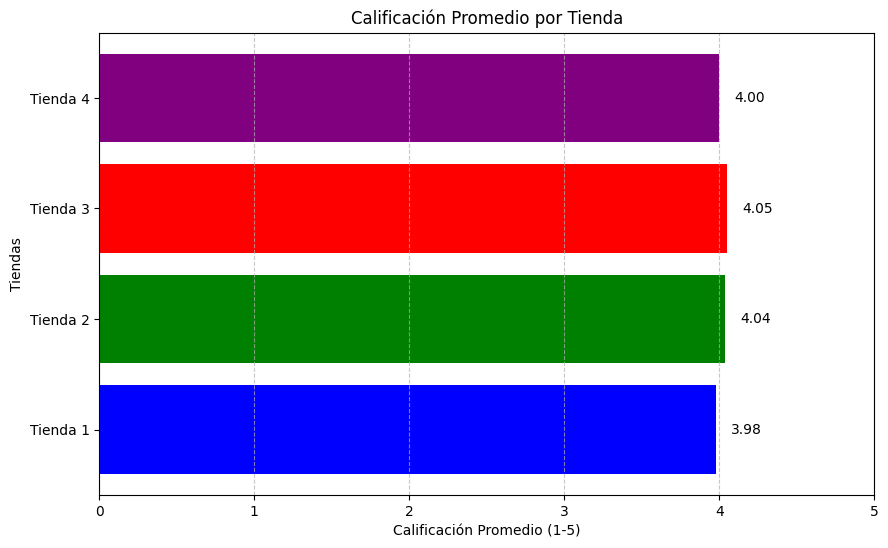

Calificación Promedio por Tienda:
Tienda 1: 3.98/5
Tienda 2: 4.04/5
Tienda 3: 4.05/5
Tienda 4: 4.00/5


In [ ]:
# 3. Calificación promedio de la tienda
# Calculamos el promedio de calificaciones por tienda
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

calificaciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]

# Creamos un gráfico de barras horizontales para comparar las calificaciones
plt.figure(figsize=(10, 6))
bars = plt.barh(tiendas, calificaciones, color=['blue', 'green', 'red', 'purple'])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio (1-5)')
plt.ylabel('Tiendas')
plt.xlim(0, 5)  # Establecemos el límite de 0 a 5 (calificación máxima)

# Añadimos los valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostramos los valores en formato de tabla
print("Calificación Promedio por Tienda:")
for i, tienda_nombre in enumerate(tiendas):
    print(f"{tienda_nombre}: {calificaciones[i]:.2f}/5")

# 4. Productos más y menos vendidos

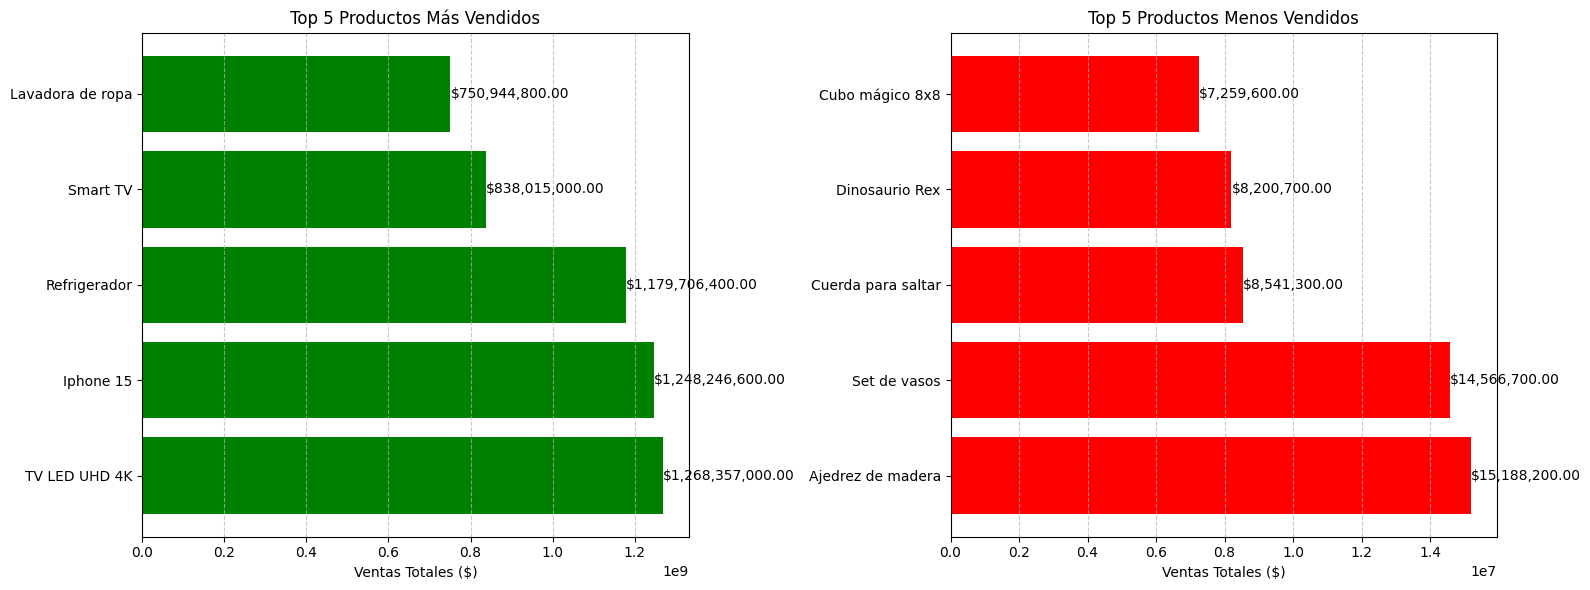

Top 5 Productos Más Vendidos:
TV LED UHD 4K: $1,268,357,000.00
Iphone 15: $1,248,246,600.00
Refrigerador: $1,179,706,400.00
Smart TV: $838,015,000.00
Lavadora de ropa: $750,944,800.00

Top 5 Productos Menos Vendidos:
Ajedrez de madera: $15,188,200.00
Set de vasos: $14,566,700.00
Cuerda para saltar: $8,541,300.00
Dinosaurio Rex: $8,200,700.00
Cubo mágico 8x8: $7,259,600.00


In [ ]:
# 4. Productos más y menos vendidos
# Combinamos todas las tiendas y calculamos las ventas totales por producto
todas_tiendas['ventas_totales'] = todas_tiendas['Precio'] * todas_tiendas['Cantidad de cuotas']
ventas_por_producto = todas_tiendas.groupby('Producto')['ventas_totales'].sum().sort_values(ascending=False)

# Obtenemos los 5 productos más vendidos y los 5 menos vendidos
top_productos = ventas_por_producto.head(5)
bottom_productos = ventas_por_producto.tail(5)

# Creamos gráficos de barras para los productos más y menos vendidos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Productos más vendidos
ax[0].barh(top_productos.index, top_productos.values, color='green')
ax[0].set_title('Top 5 Productos Más Vendidos')
ax[0].set_xlabel('Ventas Totales ($)')
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Añadimos los valores en las barras
for i, v in enumerate(top_productos):
    ax[0].text(v + 1000, i, f'${v:,.2f}', color='black', va='center')

# Productos menos vendidos
ax[1].barh(bottom_productos.index, bottom_productos.values, color='red')
ax[1].set_title('Top 5 Productos Menos Vendidos')
ax[1].set_xlabel('Ventas Totales ($)')
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

# Añadimos los valores en las barras
for i, v in enumerate(bottom_productos):
    ax[1].text(v + 1000, i, f'${v:,.2f}', color='black', va='center')

plt.tight_layout()
plt.show()

# Mostramos los valores en formato de tabla
print("Top 5 Productos Más Vendidos:")
for producto, valor in top_productos.items():
    print(f"{producto}: ${valor:,.2f}")

print("\nTop 5 Productos Menos Vendidos:")
for producto, valor in bottom_productos.items():
    print(f"{producto}: ${valor:,.2f}")

# 5. Envío promedio por tienda

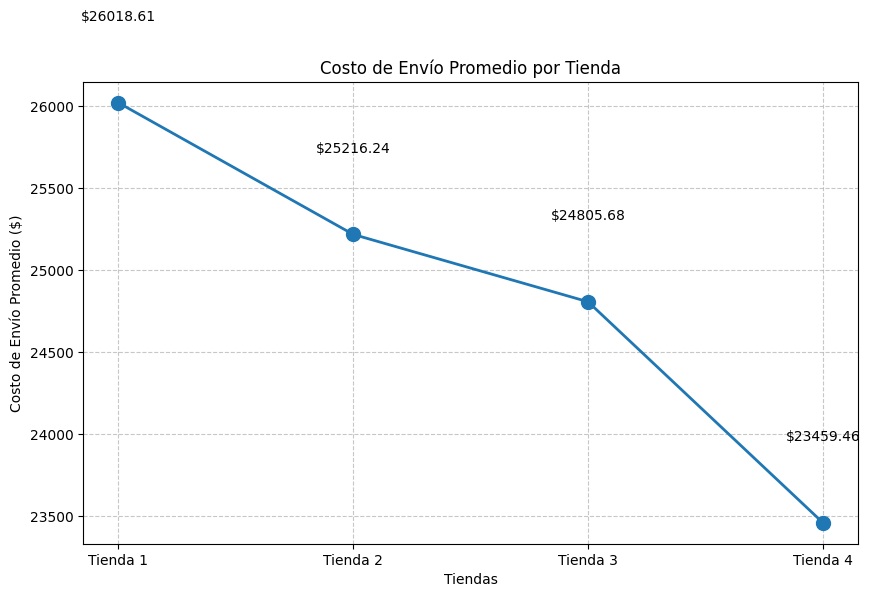

Costo de Envío Promedio por Tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46
Tienda 1: El costo de envío representa en promedio el 5.52% del precio del producto
Tienda 2: El costo de envío representa en promedio el 5.61% del precio del producto
Tienda 3: El costo de envío representa en promedio el 5.37% del precio del producto
Tienda 4: El costo de envío representa en promedio el 5.54% del precio del producto


In [ ]:
# 5. Envío promedio por tienda
# Calculamos el costo de envío promedio por tienda
envio_tienda1 = tienda['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

envios = [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]

# Creamos un gráfico de líneas para mostrar el envío promedio por tienda
plt.figure(figsize=(10, 6))
plt.plot(tiendas, envios, marker='o', linestyle='-', linewidth=2, markersize=10)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.7)

# Añadimos los valores en los puntos
for i, envio in enumerate(envios):
    plt.text(i, envio + 500, f'${envio:.2f}', ha='center')

plt.show()

# Mostramos los valores en formato de tabla
print("Costo de Envío Promedio por Tienda:")
for i, tienda_nombre in enumerate(tiendas):
    print(f"{tienda_nombre}: ${envios[i]:.2f}")

# Calculamos la relación entre el costo de envío y el precio del producto
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    df['relacion_envio_precio'] = df['Costo de envío'] / df['Precio'] * 100
    promedio_relacion = df['relacion_envio_precio'].mean()
    print(f"Tienda {i}: El costo de envío representa en promedio el {promedio_relacion:.2f}% del precio del producto")

In [ ]:
# Recomendación final
print("\n" + "="*50)
print("RECOMENDACIÓN FINAL PARA EL SR. JUAN")
print("="*50)

# Creamos una tabla de resumen con todos los indicadores clave
import pandas as pd
from IPython.display import display

resumen = pd.DataFrame({
    'Tienda': tiendas,
    'Facturación Total': facturacion,
    'Calificación Promedio': calificaciones,
    'Costo de Envío Promedio': envios
})

# Calculamos el rendimiento general (score ponderado)
# Mayor facturación es mejor (40%), mayor calificación es mejor (40%), menor costo de envío es mejor (20%)
resumen['Score Facturación'] = resumen['Facturación Total'] / resumen['Facturación Total'].max() * 40
resumen['Score Calificación'] = resumen['Calificación Promedio'] / 5 * 40
resumen['Score Envío'] = (1 - resumen['Costo de Envío Promedio'] / resumen['Costo de Envío Promedio'].max()) * 20
resumen['Score Total'] = resumen['Score Facturación'] + resumen['Score Calificación'] + resumen['Score Envío']

# Ordenamos por score total (descendente)
resumen = resumen.sort_values('Score Total', ascending=False)

# Mostramos el resumen
display(resumen)

# Identificamos la tienda menos eficiente (la que tiene el score más bajo)
tienda_menos_eficiente = resumen.iloc[-1]['Tienda']
razones = []

# Analizamos las razones específicas
if resumen.iloc[-1]['Facturación Total'] == resumen['Facturación Total'].min():
    razones.append("tiene la menor facturación total")
if resumen.iloc[-1]['Calificación Promedio'] == resumen['Calificación Promedio'].min():
    razones.append("tiene la calificación promedio más baja")
if resumen.iloc[-1]['Costo de Envío Promedio'] == resumen['Costo de Envío Promedio'].max():
    razones.append("tiene el costo de envío promedio más alto")

# Creamos un texto de recomendación
print(f"\nRecomendación: El Sr. Juan debería considerar vender la {tienda_menos_eficiente} porque:")
for i, razon in enumerate(razones, 1):
    print(f"{i}. {razon.capitalize()}")
print(f"\nCon un score total de {resumen.iloc[-1]['Score Total']:.2f}/100, esta tienda muestra el rendimiento más bajo entre todas las tiendas analizadas.")
print("\nEsta decisión permitiría al Sr. Juan enfocarse en las tiendas más rentables y eficientes, y utilizar los recursos de la venta para su nuevo emprendimiento.")


RECOMENDACIÓN FINAL PARA EL SR. JUAN


,Tienda,Facturación Total,Calificación Promedio,Costo de Envío Promedio,Score Facturación,Score Calificación,Score Envío,Score Total
1,Tienda 2,3.337189e+09,4.037304,25216.235693,39.000461,32.298432,0.616769,71.915662
0,Tienda 1,3.422718e+09,3.976685,26018.609580,40.000000,31.813480,0.000000,71.813480
2,Tienda 3,3.243817e+09,4.048326,24805.680373,37.909254,32.386604,0.932355,71.228214
3,Tienda 4,3.098827e+09,3.995759,23459.457167,36.214815,31.966073,1.967171,70.148059



Recomendación: El Sr. Juan debería considerar vender la Tienda 4 porque:
1. Tiene la menor facturación total

Con un score total de 70.15/100, esta tienda muestra el rendimiento más bajo entre todas las tiendas analizadas.

Esta decisión permitiría al Sr. Juan enfocarse en las tiendas más rentables y eficientes, y utilizar los recursos de la venta para su nuevo emprendimiento.
